In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
f0 = 220
f1 = 3520
duration = 0.5
fs = 48000  

In [3]:
octave = np.log2(f1/f0)
notes = int(np.ceil(octave * 12))+1
temperament = 2 ** (1/12)
freqs = temperament ** np.linspace(0, notes-1, notes) * f0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

In [4]:
def decay_envelope(decay, t):
    decibel = (10**(-decay/20))
    alpha = decibel ** (1/len(t))
    decay = alpha ** np.arange(1, len(t)+1)
    return decay

def cosine_decay_envelope(t):
    ticks = np.linspace(0, 1, len(t))
    decay = np.cos(ticks * np.pi * 0.5)
    return decay

In [5]:
sine_waves = []
for freq in freqs:
    decay = decay_envelope(40, t)
    sine_wave = decay * np.sin(2 * np.pi * freq * t)
    sine_waves.append(sine_wave)

final_wave = np.concatenate(sine_waves)
sf.write(f'{f0}Hz_{f1}Hz_{fs}_{duration}Sec.wav', final_wave, fs)

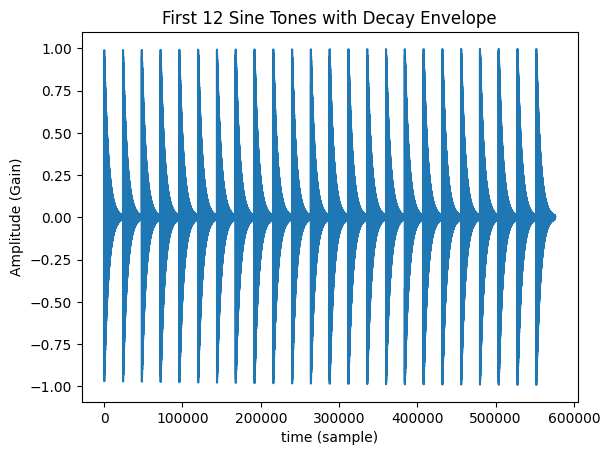

In [6]:
plt.plot(final_wave[:fs*12])
plt.xlabel('time (sample)')
plt.ylabel('Amplitude (Gain)')
plt.title('First 12 Sine Tones with Decay Envelope')
plt.show()